In [4]:
import importlib
import sys

sys.path.insert(0, '../src')
from torchview import draw_graph
import layers

importlib.reload(layers)

importlib.reload(model)
from model import InpainTor

In [4]:
model = InpainTor(num_classes=40, selected_classes=[0, 1, 2])
batch_size = 1
H, W, C = 512, 512, 3
# device='meta' -> no memory is consumed for visualization
model_graph = draw_graph(model, input_size=(batch_size, C, H, W), device='meta', graph_dir="LR")
# Save the Graphviz object as an SVG file
model_graph.visual_graph.format = 'svg'
model_graph.visual_graph.render(filename='assets/model_graph')

Enc1: torch.Size([1, 32, 256, 256]), Enc2: torch.Size([1, 64, 128, 128]), Enc3: torch.Size([1, 128, 64, 64]), Enc4: torch.Size([1, 256, 32, 32])
attention_weights data type: torch.float32
attention_weights data type: torch.float32
enc4.shape: torch.Size([1, 256, 32, 32])
attention1.shape: torch.Size([1, 128, 128, 128]), gen2.shape: torch.Size([1, 128, 128, 128]), gen_cat1.shape: torch.Size([1, 256, 128, 128])
gen_cat2.shape: torch.Size([1, 192, 256, 256])
gen4.shape: torch.Size([1, 64, 256, 256]), masked_input.shape: torch.Size([1, 3, 256, 256])
gen5.shape: torch.Size([1, 64, 512, 512])
gen7.shape: torch.Size([1, 16, 512, 512])


'model_graph.svg'

In [14]:

import torch

torch.cuda.empty_cache()
from torchinfo import summary

model = InpainTor()
summary(model, input_size=(1, 3, 512, 512))

Layer (type:depth-idx)                        Output Shape              Param #
InpainTor                                     [1, 3, 512, 512]          --
├─SharedEncoder: 1-1                          [1, 32, 256, 256]         --
│    └─SepConvBlock: 2-1                      [1, 32, 256, 256]         --
│    │    └─Sequential: 3-1                   [1, 32, 512, 512]         155
│    │    └─GELU: 3-2                         [1, 32, 512, 512]         --
│    │    └─BatchNorm2d: 3-3                  [1, 32, 512, 512]         64
│    │    └─MaxPool2d: 3-4                    [1, 32, 256, 256]         --
│    └─SepConvBlock: 2-2                      [1, 64, 128, 128]         --
│    │    └─Sequential: 3-5                   [1, 64, 256, 256]         2,400
│    │    └─GELU: 3-6                         [1, 64, 256, 256]         --
│    │    └─BatchNorm2d: 3-7                  [1, 64, 256, 256]         128
│    │    └─MaxPool2d: 3-8                    [1, 64, 128, 128]         --
│    └─SepConvB

In [50]:
torch.cuda.empty_cache()

In [73]:
import sys
import os
import importlib
import numpy as np
from matplotlib import pyplot as plt

sys.path.insert(0, '../src')
import dataset

importlib.reload(dataset)
from dataset import CamVidDataset

In [74]:
# Data directory
root_dir = "/home/tiagociiic/Projects/InpainTor"
data_dir = os.path.join(root_dir, "data/CamVid")

# Initialize the dataset
dataset = CamVidDataset(root_dir=data_dir, split='train', image_size=(512, 512), mask_size=(256, 256))

# Retrieve a sample from the dataset
sample = dataset[21]  # Change the index if you want to retrieve a different sample
sample['image'] = (sample['image'] + 1) / 2
# sample['mask'] = (sample['mask'] + 1) / 2

# Print the shapes and data types of the image and mask
print(
    f"Image shape: {sample['image'].shape}, dtype: {sample['image'].dtype}, max: {sample['image'].max()}, min: {sample['image'].min()}")
print(
    f"Mask shape: {sample['mask'].shape}, dtype: {sample['mask'].dtype}, max: {sample['mask'].max()}, min: {sample['mask'].min()}")

# Show unique values in the mask
print(f"Unique values in the mask: {np.unique(sample['mask'])}")

Loading class dictionary...
Loading image and mask files...

__getitem__: Image shape: torch.Size([3, 512, 512]), max: 1.0, min: -0.9843137264251709, data type: torch.float32
__getitem__: Mask shape: (256, 256), max: 30, min: 0, data type: int32
Image shape: torch.Size([3, 512, 512]), dtype: torch.float32, max: 1.0, min: 0.00784313678741455
Mask shape: (256, 256), dtype: int32, max: 30, min: 0
Unique values in the mask: [ 0  4  5  8 10 12 16 17 21 22 26 29 30]


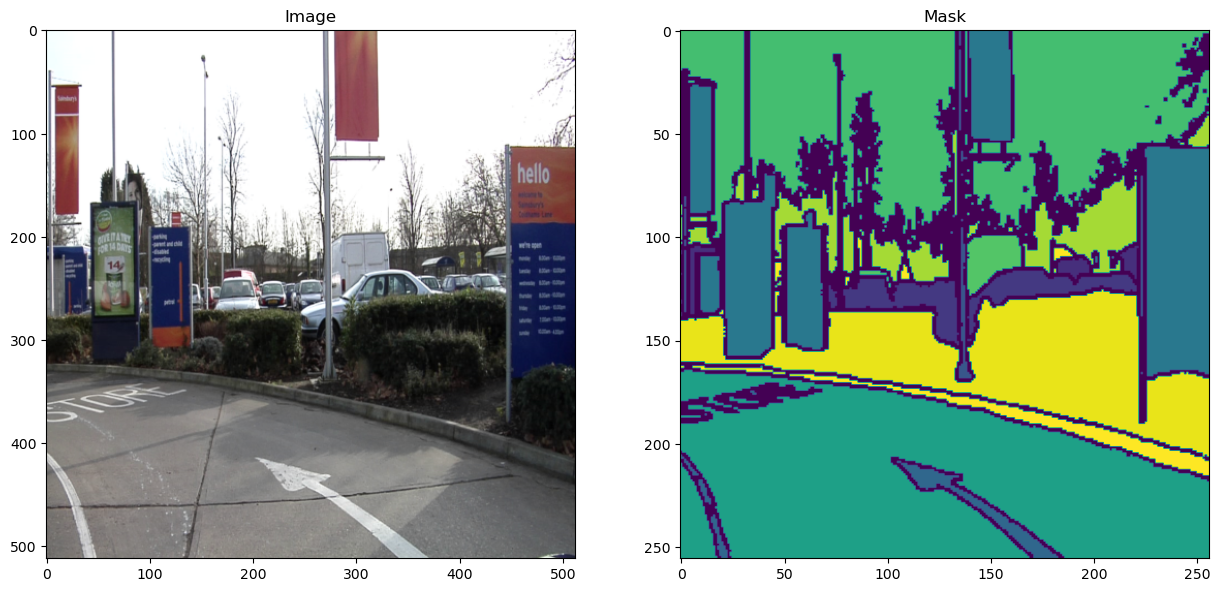

Text(0.5, 1.0, 'Mask Histogram')

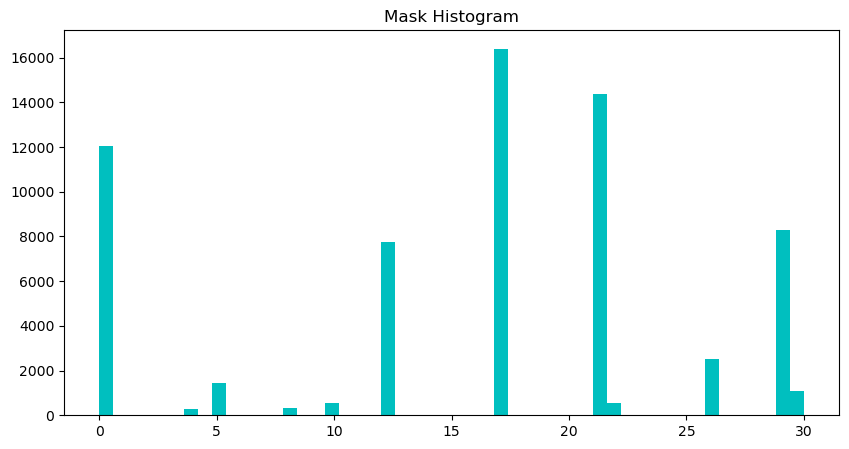

In [75]:
# subplot with image and mask
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

sample['image'] = sample['image'].permute(1, 2, 0)
ax[0].imshow(sample['image'])
ax[0].set_title('Image')
ax[1].imshow(sample['mask'])
ax[1].set_title('Mask')
plt.show()

# plot histogram of the mask
plt.figure(figsize=(10, 5))
plt.hist(sample['mask'].flatten(), bins=50, color='c')
plt.title('Mask Histogram')

In [6]:
import os
import imageio


def create_video_from_images(image_folder, output_path, fps=30):
    image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.png')]
    image_files.sort()
    frames = []
    for file in image_files:
        img = imageio.v2.imread(file)  # Use imageio.v2.imread instead of imageio.imread
        frames.append(img)
    imageio.mimwrite(output_path, frames, fps=fps)


root_dir = "/home/tiagociiic/Projects/InpainTor"
image_folder = os.path.join(root_dir, 'data/CamVid', 'test', 'masks')
output_path = os.path.join(root_dir, 'outputs', 'mask_test_video.mp4')
create_video_from_images(image_folder, output_path)

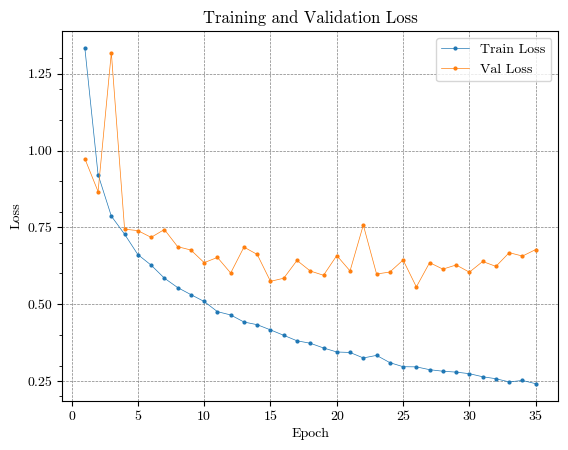

In [4]:
import sys
import os
import importlib

sys.path.insert(0, '../src')

import logger

importlib.reload(logger)
from logger import Plotter

root_dir = "/home/tiagociiic/Projects/InpainTor"
plotter = Plotter(os.path.join(root_dir, 'logs', 'metrics_segmentor.txt'))
plotter.plot(log_scale=False)

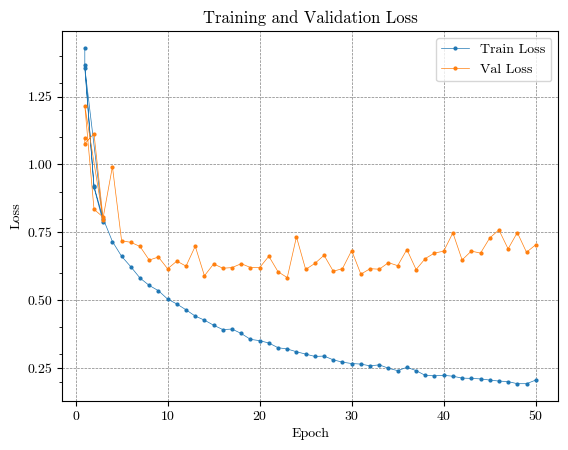

In [6]:
import sys
import os
import importlib

sys.path.insert(0, '../src')

import logger

importlib.reload(logger)
from logger import Plotter

root_dir = "/home/tiagociiic/Projects/InpainTor"
plotter = Plotter(os.path.join(root_dir, 'logs', 'metrics_segmentor.txt'))
plotter.plot(log_scale=False)

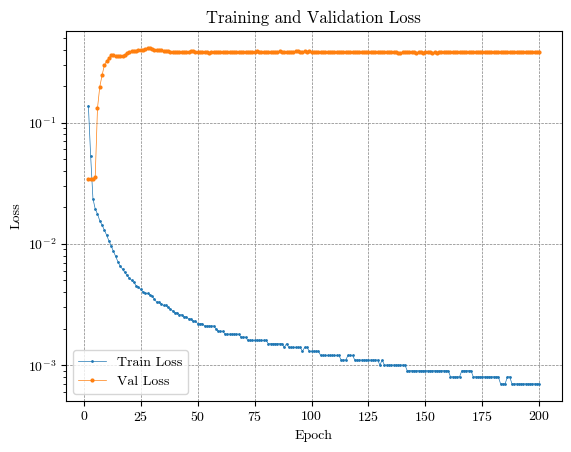

In [6]:
import re
import matplotlib.pyplot as plt
import datetime
import os
import matplotlib as mpl

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['cmr10']
mpl.rcParams['axes.formatter.use_mathtext'] = True


def plot_training_log(file_path, log_scale=False):
    # Regular expression to extract data from each line
    pattern = r".+Epoch (\d+), Loss: (\d+\.\d+), Val Loss: (\d+\.\d+), Best Val Loss: (\d+\.\d+), Timestamp: (.+)"
    epoch, loss, val_loss, best_val_loss, timestamp = [], [], [], [], []

    # Open the file and read it line by line
    with open(file_path, 'r') as f:
        for line in f:
            match = re.match(pattern, line)
            if match:
                epoch.append(int(match.group(1)))
                loss.append(float(match.group(2)))
                val_loss.append(float(match.group(3)))
                best_val_loss.append(float(match.group(4)))
                timestamp.append(datetime.datetime.strptime(match.group(5), "%Y-%m-%d %H:%M:%S"))

    plt.grid(visible=True, color='gray', linestyle='--', linewidth=0.5)
    plt.plot(epoch, loss, label='Train Loss', marker='o', linestyle='-', linewidth=0.5, markersize=1)
    plt.plot(epoch, val_loss, label='Val Loss', marker='o', linestyle='-', linewidth=0.5, markersize=2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    if log_scale:
        plt.yscale('log')
    # Show the plot
    plt.show()


# Example usage
plot_training_log('/home/tiagociiic/Projects/InpainTor/logs/train2024-06-20 18:57:18.log', log_scale=True)


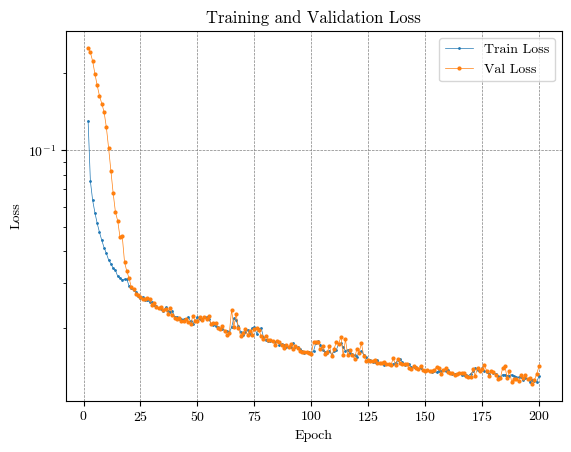

In [7]:
plot_training_log('/home/tiagociiic/Projects/InpainTor/logs/train2024-06-21 09:19:05.log', log_scale=True)

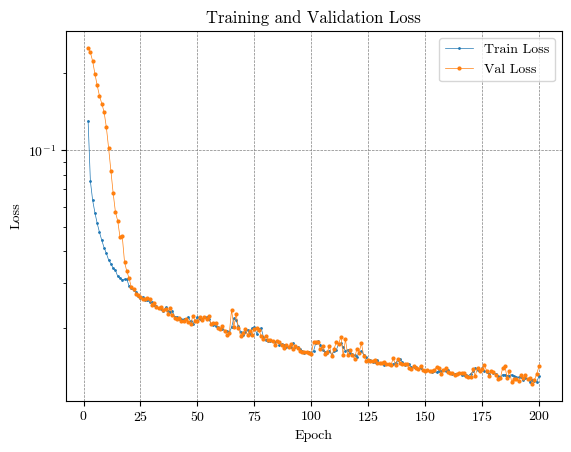

In [10]:
plot_training_log('/home/tiagociiic/Projects/InpainTor/logs/train2024-06-21 09:19:05.log', log_scale=True)

In [ ]:
import torch

checkpoint_path = '/home/tiagociiic/Projects/InpainTor/checkpoints/best_InPainTor_segmentation_2024-07-19.pth'
checkpoint = torch.load(checkpoint_path)
print(checkpoint.keys())